In [2]:
import pandas as pd

# Load each dataset
location = pd.read_csv('/Users/vaji/Documents/01 VU-Uni/P6/ML4QS/bike/Location.csv')
linear_accelerometer = pd.read_csv('/Users/vaji/Documents/01 VU-Uni/P6/ML4QS/bike/Linear Accelerometer.csv')
gyroscope = pd.read_csv('/Users/vaji/Documents/01 VU-Uni/P6/ML4QS/bike/Gyroscope.csv')
accelerometer = pd.read_csv('/Users/vaji/Documents/01 VU-Uni/P6/ML4QS/bike/Accelerometer.csv')


In [3]:
# Example for the Accelerometer data
print(accelerometer.head())
print(accelerometer.describe())
print(accelerometer.isnull().sum())


   Time (s)  X (m/s^2)  Y (m/s^2)  Z (m/s^2)
0 -0.001048  -1.927991   7.913893   4.790488
1  0.008949  -2.010469   7.819140   4.888983
2  0.018945  -2.193089   7.950866   5.035978
3  0.028942  -2.557432   8.106393   5.210066
4  0.038938  -2.679428   8.100405   5.429659
           Time (s)     X (m/s^2)     Y (m/s^2)     Z (m/s^2)
count  71719.000000  71719.000000  71719.000000  71719.000000
mean     358.457394     -0.943672     -0.469482      2.159840
std      206.957503      7.911487      2.572234      5.126835
min       -0.001048    -21.858595    -12.440779    -15.892601
25%      179.231052     -8.582103     -2.028582     -2.577939
50%      358.459650     -2.528392     -0.637524      3.515140
75%      537.685788      7.049291      1.005010      6.298976
max      716.904281     19.890188     14.956298     26.089097
Time (s)     0
X (m/s^2)    0
Y (m/s^2)    0
Z (m/s^2)    0
dtype: int64


In [4]:
# Apply a rolling mean with a window of 5 samples
accelerometer['X (m/s^2)'] = accelerometer['X (m/s^2)'].rolling(window=5, min_periods=1).mean()
accelerometer['Y (m/s^2)'] = accelerometer['Y (m/s^2)'].rolling(window=5, min_periods=1).mean()
accelerometer['Z (m/s^2)'] = accelerometer['Z (m/s^2)'].rolling(window=5, min_periods=1).mean()


In [5]:
# Check the first few rows and summary statistics after smoothing
print(accelerometer.head())
print(accelerometer.describe())


   Time (s)  X (m/s^2)  Y (m/s^2)  Z (m/s^2)
0 -0.001048  -1.927991   7.913893   4.790488
1  0.008949  -1.969230   7.866516   4.839736
2  0.018945  -2.043850   7.894633   4.905150
3  0.028942  -2.172245   7.947573   4.981379
4  0.038938  -2.273682   7.978139   5.071035
           Time (s)     X (m/s^2)     Y (m/s^2)     Z (m/s^2)
count  71719.000000  71719.000000  71719.000000  71719.000000
mean     358.457394     -0.943734     -0.469482      2.159811
std      206.957503      7.883857      2.535103      5.090507
min       -0.001048    -18.260407    -12.310161    -13.769626
25%      179.231052     -8.596384     -2.002940     -2.577730
50%      358.459650     -2.611260     -0.643841      3.562891
75%      537.685788      7.034966      0.970941      6.303452
max      716.904281     17.078136     12.329022     18.060633


In [6]:
from scipy import stats
import numpy as np

# Calculate Z-scores of the data
z_scores = np.abs(stats.zscore(accelerometer[['X (m/s^2)', 'Y (m/s^2)', 'Z (m/s^2)']]))
threshold = 3  # Common cutoff for outliers

# Filter out the outliers
accelerometer_clean = accelerometer[(z_scores < threshold).all(axis=1)]

# Check how much data remains after removing outliers
print(f"Original data points: {len(accelerometer)}, Cleaned data points: {len(accelerometer_clean)}")


Original data points: 71719, Cleaned data points: 69888


In [8]:
# Save the cleaned accelerometer data to a new CSV file
accelerometer_clean.to_csv('/Users/vaji/Documents/01 VU-Uni/P6/ML4QS/bike/Accelerometer_Cleaned.csv', index=False)


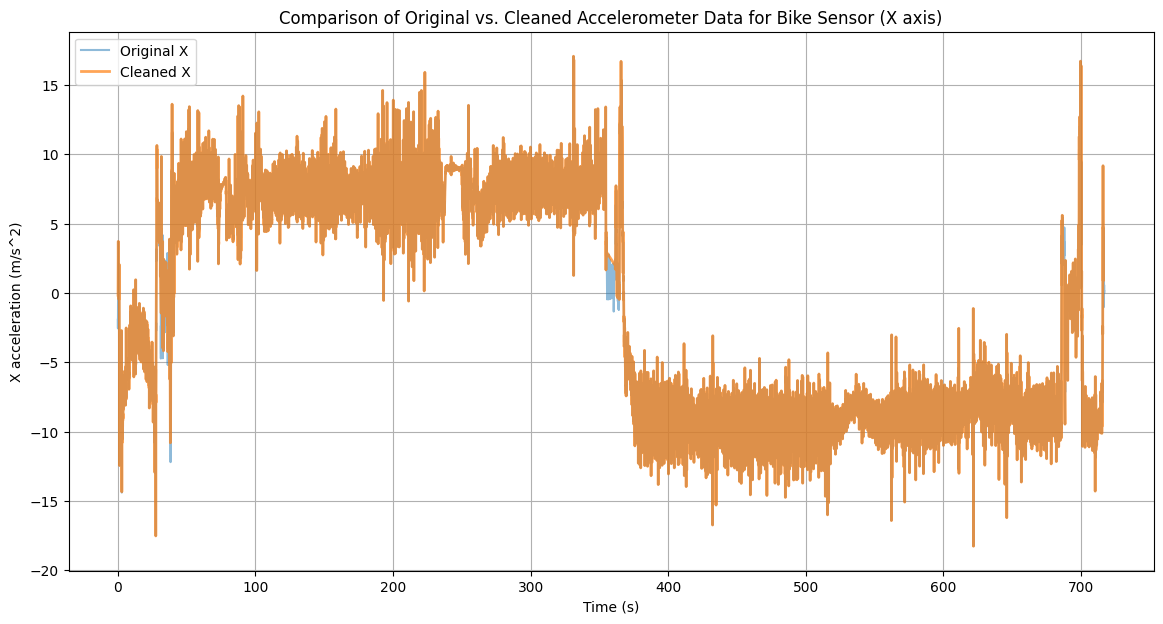

In [9]:
import matplotlib.pyplot as plt

# Ensure you have already imported the necessary libraries and data
# If you haven't, uncomment the following lines to import them
# import pandas as pd
# accelerometer = pd.read_csv('path_to_file/Accelerometer.csv') # Adjust path as necessary
# Apply cleaning steps here as previously discussed

# Plotting
plt.figure(figsize=(14, 7))  # Set the figure size as needed

# Original Data
plt.plot(accelerometer['Time (s)'], accelerometer['X (m/s^2)'], label='Original X', alpha=0.5)

# Cleaned Data
plt.plot(accelerometer_clean['Time (s)'], accelerometer_clean['X (m/s^2)'], label='Cleaned X', alpha=0.7, linewidth=2)

plt.title('Comparison of Original vs. Cleaned Accelerometer Data for Bike Sensor (X axis)')
plt.xlabel('Time (s)')
plt.ylabel('X acceleration (m/s^2)')
plt.legend()
plt.grid(True)

plt.show()
